In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
N=3

# N X D (n_examples X n_features)
X1=np.array([[5,3,2],[4,6,0],[3,-7,14]])
X2=np.array([[-2,-5,17],[3,-13,10],[-4,-2,16]])

In [3]:
m1=np.mean(X1, axis=0)
m2=np.mean(X2, axis=0)

Z1=X1-m1
Z2=X2-m2

### Linear Discriminant Analysis

**We need to maximize:**

\begin{equation}
\mathrm{J}(\mathrm{u})=\frac{\mathrm{u}^{\mathrm{T}} \mathrm{S}_{\mathrm{B}} \mathrm{u}}{\mathrm{u}^{\mathrm{T}} \mathrm{S}_{\mathrm{W}} \mathrm{u}}
\end{equation}

where: 

Between class variance
\begin{equation}
\mathrm{S}_{\mathrm{B}}=\left(\mathrm{m}_{1}-\mathrm{m}_{2}\right)\left(\mathrm{m}_{1}-\mathrm{m}_{2}\right)^{\mathrm{T}}
\end{equation}

Within Class variance
\begin{equation}
s_{1}^{2}+s_{2}^{2}=u^{T} S_{w} u
\end{equation}

\begin{equation}
s_{1}^{2}=\sum_{y \in W 1}\left(y-m_{y 1}\right)^{2}
\end{equation}

**Solution to the optimization problem:**

\begin{equation}
\mathrm{u}=\mathrm{S}_{\mathrm{W}}^{-1}\left(\mathrm{~m}_{1}-\mathrm{m}_{2}\right)
\end{equation}

In [4]:
SW = np.transpose(Z1)@Z1 + np.transpose(Z2)@Z2

m=(m1-m2).reshape(-1,1)
SB=m@np.transpose(m)

In [5]:
#solution of LDA 
u = np.linalg.inv(SW)@(m1-m2)
u

array([3.20696762, 1.19519136, 1.29038273])

In [6]:
#lDA transformed vectors

Y1 = X1@u
Y2 = X2@u

In [7]:
print('Class 1:', Y1)
print('Class 2:', Y2)

Class 1: [22.20117763 19.99901865 19.31992149]
Class 2: [9.54661433 6.98724239 5.42787046]


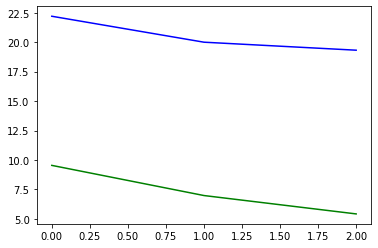

In [8]:
plt.plot(Y1,c='b')
plt.plot(Y2,c='g')

plt.show()

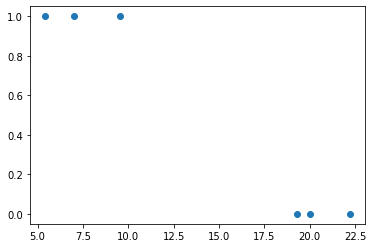

In [9]:
#another way to view the results

plt.scatter(Y1.tolist() + Y2.tolist(),[0,0,0,1,1,1])
plt.show()

**We notice that the transformed data-points are linearly-separable now.**

### Principal Component Analysis

Let's do PCA on the same data irrespective of labels. 

**PCA is an unsupervised learning method and LDA is supervised learning method.** Both of these methods can be used for dimension reduction. 

In [10]:
X=np.hstack((X1,X2)).transpose()
X

array([[  5,   4,   3],
       [  3,   6,  -7],
       [  2,   0,  14],
       [ -2,   3,  -4],
       [ -5, -13,  -2],
       [ 17,  10,  16]])

In [11]:
# manually calculating sigma 
# also can be calculated as sigma = np.cov(X.transpose()).round(2)

X1 = X-np.mean(X, axis=0)
sigma = ((np.transpose(X1)@X1) / (len(X1)-1)).round(2)
sigma

array([[57.87, 46.73, 49.07],
       [46.73, 62.67, 22.13],
       [49.07, 22.13, 92.67]])

In [12]:
pca = PCA(n_components=2)
y=[0,0,0,1,1,1]

X1_pca = pca.fit_transform(X1)
X1_pca

array([[  1.84905052,   2.21035411],
       [ -4.99837065,  10.01337259],
       [  5.50545894,  -8.71213925],
       [ -7.33552389,   4.82921109],
       [-15.29674133,  -8.39043108],
       [ 20.2761264 ,   0.04963254]])

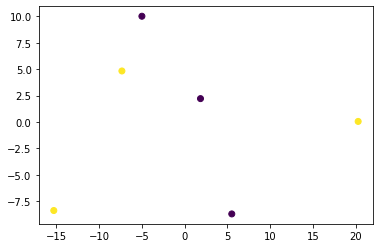

In [13]:
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=y)
plt.show()

**Hence, we can notice that PCA does not aim to linearly separate the data, unlike LDA. It aims to maximize variance capture through linear combinations of variables.**